# 线性回归的应用---波士顿房屋价格预测

本节使用线性回归的python实现方法，应用案例数据集，来详细说明线性回归模型是如何应用的。

![boston_houses](image/boston_houses.jpeg)



数据集是1970年波士顿各地区的房价和其他统计信息，包含506个样本，每个样本包含14个属性，如下表所示：

|属性|翻译|定义|
|---|---|---|
|CRIM|犯罪率|per capita crime rate by town|
|ZN|住宅用地比例|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|非零售商业用地比例|proportion of non-retail business acres per town.|
|CHAS|是否临河，1为是，0为否|Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX|氮氧化物浓度|nitric oxides concentration (parts per 10 million)|
|RM|每栋住宅平均房间数|average number of rooms per dwelling|
|AGE|1940年以前建筑比例|proportion of owner-occupied units built prior to 1940|
|DIS|与市中心的距离|weighted distances to five Boston employment centres|
|RAD|高速公路的可接近性|index of accessibility to radial highways|
|TAX|房地产税率|full-value property-tax rate per $10,000 |
|PTRATIO| 师生比例|pupil-teacher ratio by town|
|B|有色人种比例|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT|低端人口比例| lower status of the population|
|MEDV|房价中位数|Median value of owner-occupied homes in \$1000's|





该数据集用于回归问题，包含13个自变量，因变量为**MEDV 房价中位数**。  
数据集来源：  
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.  
数据位置：【数据/波士顿房价数据.csv】

## 1. 读取数据

In [1]:
EN_CN_dict = {'CRIM': '犯罪率',
             'ZN': '住宅用地比例',
             'INDUS': '非零售商业用地比例',
             'CHAS': '是否临河',
             'NOX': '氮氧化物浓度',
             'RM': '每栋住宅平均房间数',
             'AGE': '1940年以前建筑比例',
             'DIS': '与市中心的距离',
             'RAD': '高速公路的可接近性',
             'TAX': '房地产税率',
             'PTRATIO': '师生比例',
             'B': '有色人种比例',
             'LSTAT': '低端人口比例',
             'MEDV': '房价中位数'}

In [2]:
import pandas as pd
df = pd.read_csv("数据/波士顿房价数据.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.columns = [EN_CN_dict[i] for i in df.columns]
df.head()

,犯罪率,住宅用地比例,非零售商业用地比例,是否临河,氮氧化物浓度,每栋住宅平均房间数,1940年以前建筑比例,与市中心的距离,高速公路的可接近性,房地产税率,师生比例,有色人种比例,低端人口比例,房价中位数
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,犯罪率,住宅用地比例,非零售商业用地比例,是否临河,氮氧化物浓度,每栋住宅平均房间数,1940年以前建筑比例,与市中心的距离,高速公路的可接近性,房地产税率,师生比例,有色人种比例,低端人口比例,房价中位数
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 2. 数据预处理
### 2.1 处理重复值
首先，检查下数据是否存在重复，使用`DataFrame.duplicated()`检查是否存在重复的行，`True`代表为重复行，`False`代表不是重复行。

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [6]:
df.loc[df.duplicated()]

,犯罪率,住宅用地比例,非零售商业用地比例,是否临河,氮氧化物浓度,每栋住宅平均房间数,1940年以前建筑比例,与市中心的距离,高速公路的可接近性,房地产税率,师生比例,有色人种比例,低端人口比例,房价中位数


### 2.2 处理缺失值
其次，检查是否存在缺失值问题。使用`DataFrame.isnull()`返回`True`代表有，`False`代表没有。

In [7]:
df.isnull()

,犯罪率,住宅用地比例,非零售商业用地比例,是否临河,氮氧化物浓度,每栋住宅平均房间数,1940年以前建筑比例,与市中心的距离,高速公路的可接近性,房地产税率,师生比例,有色人种比例,低端人口比例,房价中位数
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

犯罪率            0
住宅用地比例         0
非零售商业用地比例      0
是否临河           0
氮氧化物浓度         0
每栋住宅平均房间数      0
1940年以前建筑比例    0
与市中心的距离        0
高速公路的可接近性      0
房地产税率          0
师生比例           0
有色人种比例         0
低端人口比例         0
房价中位数          0
dtype: int64

### 2.3 处理异常值
检查是否存在异常值问题。

<AxesSubplot:>

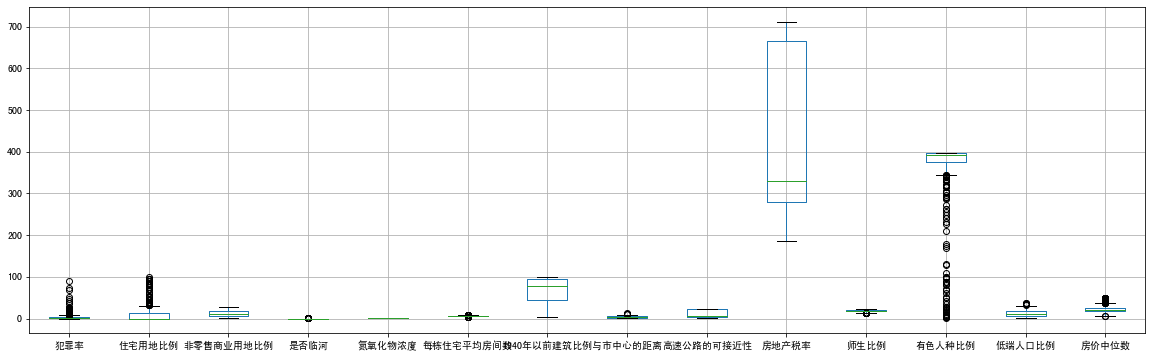

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
df.boxplot(figsize=(20,6))

为了方便观察，我们可以分别绘制各个属性（特征）的箱形图。

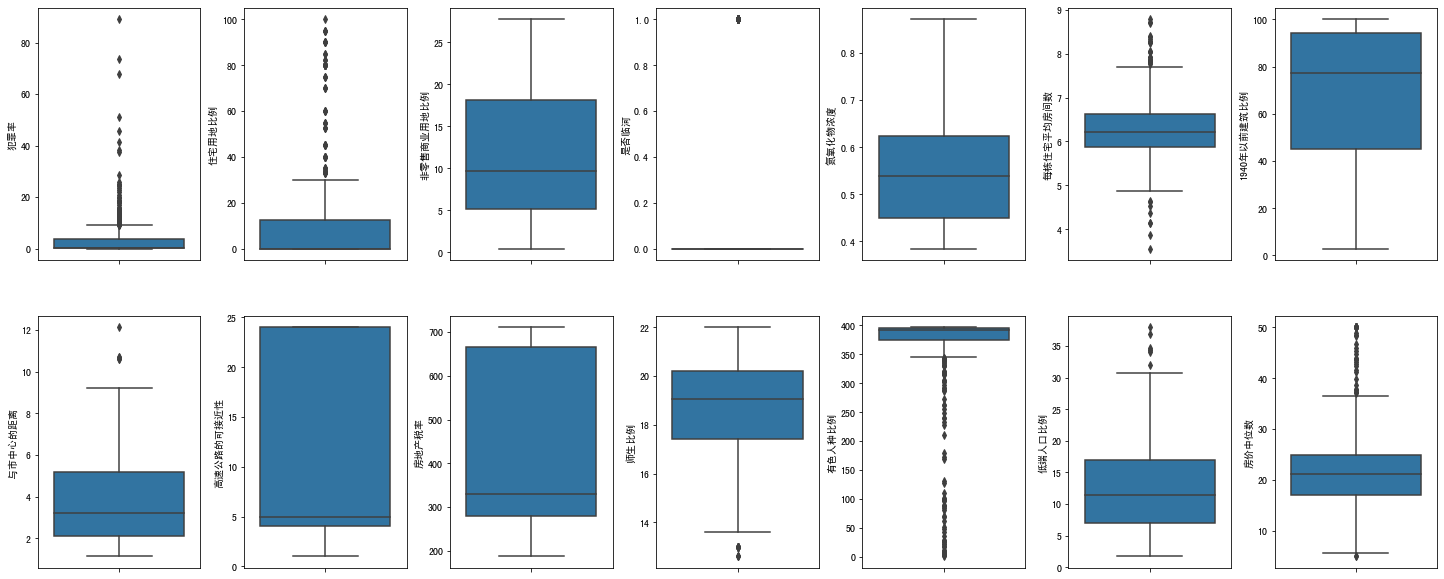

In [10]:
import seaborn as sns
fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize = (20, 8))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

观察发现，部分变量存在比较多的异常值（Outliers），我们下面使用箱形图的去除异常值的方法。

In [11]:
import numpy as np
QU = df.quantile(0.75)
QL = df.quantile(0.25)
IQR = QU - QL
df[df>(QU + 1.5*IQR)] = np.nan
df = df.fillna(QU + 1.5*IQR)
df[df<(QU - 1.5*IQR)] = np.nan
df = df.fillna(QU - 1.5*IQR)

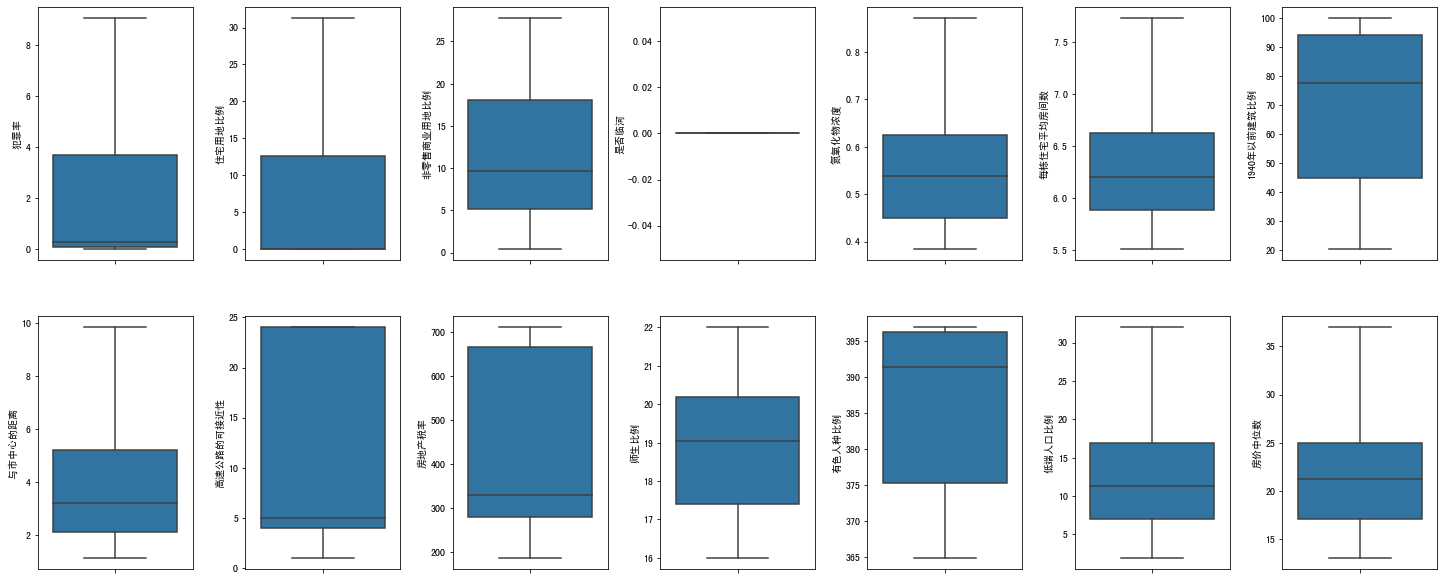

In [12]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 8))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

### 2.4 标准化处理
观察上面的箱形图，你会发现各个变量的取值范围差异较大，有没有什么办法将变量的取值范围统一呢？常用的标准化处理方法有最小最大值标准化处理、均值标准差标准化处理、小数标度标准化处理等。下面我们采用均值标准差标准化处理：

$$
standardize(S) = \frac{S - \mu_S}{\sigma_S}
$$

In [13]:
df = (df - df.mean())/df.std()

<AxesSubplot:>

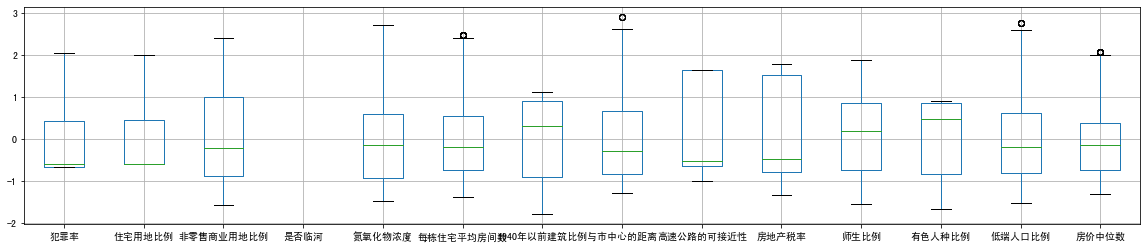

In [14]:
df.boxplot(figsize=(20,4))

In [15]:
df.drop(labels=['是否临河'], axis=1, inplace=True)

### 2.5 生成解释变量（自变量）X和被解释变量（因变量）y

生成模型的解释变量x和被解释变量y

In [16]:
X = df[['犯罪率', '住宅用地比例', '非零售商业用地比例', '氮氧化物浓度', '每栋住宅平均房间数', '1940年以前建筑比例',
       '与市中心的距离', '高速公路的可接近性', '房地产税率', '师生比例', '有色人种比例', '低端人口比例' ]]
y = df['房价中位数']

## 3. 相关性分析

在做多元回归之前，我们需要确定因变量（被解释变量）和自变量（解释变量）之间是否存在相关性。可以使用`pandas.dataframe.corr()`来计算相关系数矩阵：
> seaborn是一个底层基于matplotlib的数据可视化库，它主要用于绘制变量间的统计关系。更多用法请见[官网链接](http://seaborn.pydata.org/index.html)。

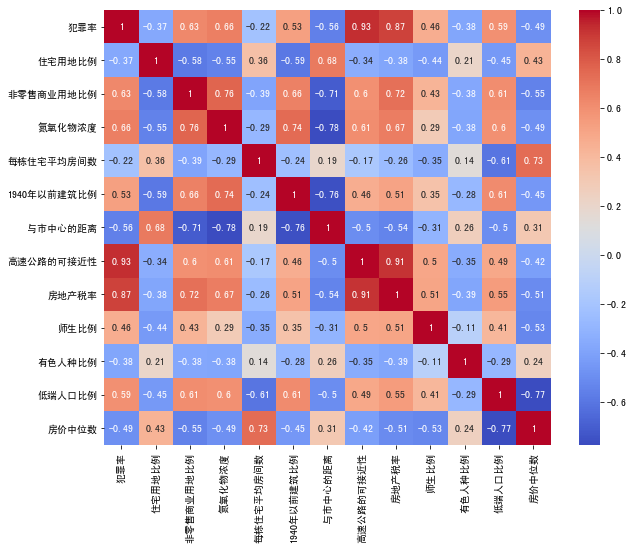

In [38]:
# correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

我们使用seaborn来绘制变量和变量之间相关性的热力图，颜色为深色代表相关性越弱，颜色越浅代表相关性越强。接近红色，为正相关，接近蓝色，为负相关。

观察上面结果，部分解释变量和解释变量之间存在很高的相关性。

当然，我们可以绘制散点图观察解释变量和被解释变量之间的相关性，同时绘制一元回归的回归线。


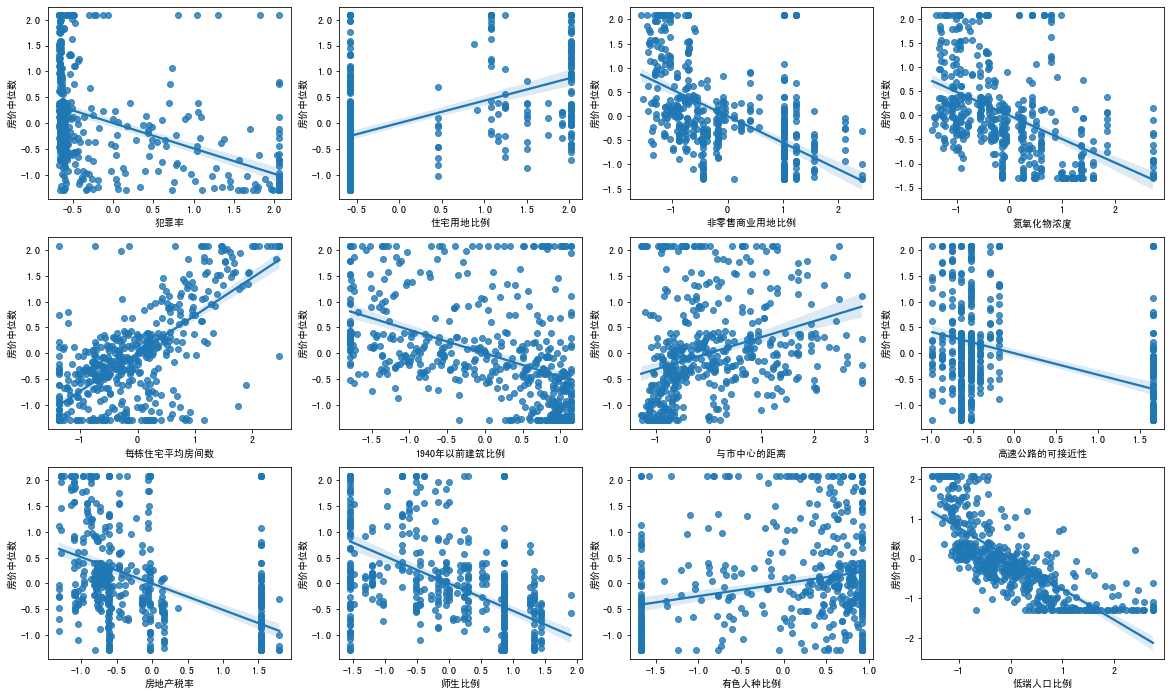

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

axs = axs.flatten()
for i, k in enumerate(X.columns):
    sns.regplot(y=y, x=X[k], ax=axs[i])

通过以上的绘图，能够看到**房价中位数**和**每栋住宅平均房价数**有明显的正的线性关系；和**低端人口比例**有明显的负的线性关系。

## 4. 样本内和样本外划分

![fix_split](image/fix_split.png)

一般将80%的原始数据集的子样本集作为样本内(In-sample, IS)，剩余20%作为样本外(Out-of-sample, OOS)。样本总数为500个，一种简单的切割方法是直接指定前400个样本为IS，后面为OOS，但是这种采样方法存在弊端。

In [19]:
train_x = X.values[:400]
train_y = y.values[:400]
test_x = X.values[400:]
test_y = y.values[400:]

![random_split](image/random_split.png)

当我们并不了解原始数据集是不是被刻意排列了，最好的办法是使用随机抽样，即随机抽80%为IS，剩余的20%为OOS。使用`sklearn.model_selection.train_test_split`

In [20]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y,train_size=0.8,random_state=42)

## 5. 多元回归分析

### 5.1 样本内训练

首先，初始化线性回归模型

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()

其次，训练模型

In [22]:
model.fit(train_x, train_y)

LinearRegression()

然后，生成预测结果

In [23]:
IS_predicted_y = model.predict(train_x)

再次，计算模型预测精度和拟合优度$R^2$

In [24]:
IS_precision = model.score(train_x, train_y)

In [25]:
from sklearn.metrics import r2_score
IS_r2 = r2_score(IS_predicted_y, train_y)

最后，生成汇总信息（summary）

In [26]:
print("系数: %s" %model.coef_)
print("截距: %.4f" %model.intercept_)
print("样本内(IS)训练集精度:%.2f" %IS_precision)
print("拟合优度R-squared: %.2f" % IS_r2)

系数: [-0.2034494   0.07143099 -0.01488885 -0.1598266   0.38757436 -0.08423319
 -0.33673482  0.28565596 -0.19120858 -0.19305642  0.02890777 -0.35998706]
截距: -0.0016
样本内(IS)训练集精度:0.79
拟合优度R-squared: 0.73


模型的回归方程是

$$
房价中位数 = (-0.2)\times犯罪率+(0.07)\times住宅用地比例+(-0.01)\times非零售商业用地比例\\+(-0.16)\times氮氧化物浓度+(0.39)\times每栋住宅平均房间数\\+(-0.08)\times1940年以前建筑比例+(-0.34)\times与市中心的距离+(0.29)\times高速公路的可接近性+(-0.19)\times房地产税率\\+(-0.19)\times师生比例+(0.03)\times有色人种比例+(-0.36)\times低端人口比例+-0.0016
$$

我们将样本内IS的房价y和预测出的y绘制到一张图片上：

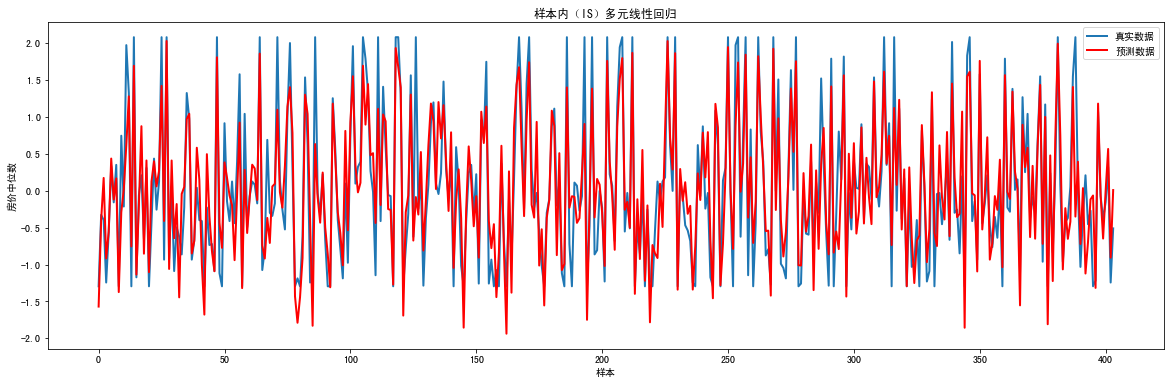

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(range(len(train_y)), train_y, label='真实数据', linewidth=2)
ax.plot(range(len(train_y)), IS_predicted_y, label='预测数据', linewidth=2, color="red")
ax.set_xlabel('样本')
ax.set_ylabel('房价中位数')
ax.set_title('样本内（IS）多元线性回归')
ax.legend()
plt.show()

### 5.2 样本外表现

我们再来看看我们刚才训练的模型，在样本外的表现。

In [28]:
OOS_predicted_y = model.predict(test_x)

再次，计算模型预测精度和拟合优度$R^2$

In [29]:
OOS_precision = model.score(test_x, test_y)

In [30]:
from sklearn.metrics import r2_score
OOS_r2 = r2_score(OOS_predicted_y, test_y)

最后，生成汇总信息（summary）

In [31]:
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)
print("拟合优度R-squared: %.2f" % OOS_r2)

样本外（OOS）测试集预测精度:0.74
拟合优度R-squared: 0.73


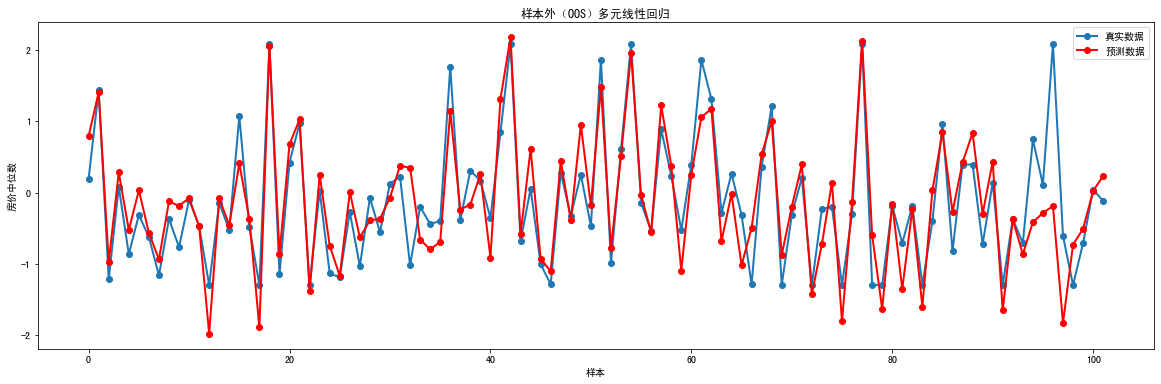

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(range(len(test_y)), test_y, 'o-', label='真实数据', linewidth=2)
ax.plot(range(len(test_y)), OOS_predicted_y, 'o-', label='预测数据', linewidth=2, color="red")
ax.set_xlabel('样本')
ax.set_ylabel('房价中位数')
ax.set_title('样本外（OOS）多元线性回归')
ax.legend()
plt.show()

In [33]:
print("样本内(IS)训练集精度:%.2f" %IS_precision)
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)
print("拟合优度R-squared: %.2f" % IS_r2)
print("拟合优度R-squared: %.2f" % OOS_r2)

样本内(IS)训练集精度:0.79
样本外（OOS）测试集预测精度:0.74
拟合优度R-squared: 0.73
拟合优度R-squared: 0.73


根据上述的回归分析结果，样本内和样本外的预测精度和拟合优度均较为良好。

## 6. 结论

最后，我们根据回归方程：

$$
房价中位数 = (-0.2)\times犯罪率+(0.07)\times住宅用地比例+(-0.01)\times非零售商业用地比例+(-0.16)\times氮氧化物浓度+(0.39)\times每栋住宅平均房间数+(-0.08)\times1940年以前建筑比例+(-0.34)\times与市中心的距离+(0.29)\times高速公路的可接近性+(-0.19)\times房地产税率+(-0.19)\times师生比例+(0.03)\times有色人种比例+(-0.36)\times低端人口比例+-0.0016
$$

可以得出以下结论，在保持其他自变量不变的情况下：
1. 每增加一个单位的**每栋住宅平均房间数**，都会带来0.39个单位的**房价中位数**上涨; 
2. 每增加一个单位的**与市中心的距离**，都会带来0.34个单位的**房价中位数**下降; 
3. 每增加一个单位的**都低端人口比例**，会带来0.36个单位的**房价中位数**下降; 
4. 每增加一个单位的**高速公路的可接近性**, 都会带来0.29个单位的**房价中位数**上涨; 


## 7. 思考

在结束此案例分析之前，我们思考以下问题：
1. 从1978年开始收集的数据与今天的数据相似性如何、是否还有参照意义？通货膨胀是否要考虑?
2. 数据中的特征是否足以描述房屋价格？你认为装修质量、公摊面积、是否有花园等因素应该考虑进去吗?
3. 在城市收集的数据适用于农村和集镇吗?
4. 如果一个房屋所有者想要出售他的房屋，他应用此模型预测了他的房屋价格，你认为他该如何说服买家相信这个模型给出的价格？